In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Question 1

### Use decision trees to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
fraud_check=pd.read_csv('/Users/apple/Downloads/Fraud_check.csv')

In [3]:
fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
label_encoder = preprocessing.LabelEncoder()
fraud_check['Urban']= label_encoder.fit_transform(fraud_check['Urban']) 

In [5]:
fraud_check.rename(columns={"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"}, inplace= True)

In [6]:
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,1
1,YES,Divorced,33700,134075,18,1
2,NO,Married,36925,160205,30,1
3,YES,Single,50190,193264,15,1
4,NO,Married,81002,27533,28,0


In [7]:
label_encoder = preprocessing.LabelEncoder()
fraud_check['Undergrad']= label_encoder.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital_Status']= label_encoder.fit_transform(fraud_check['Marital_Status'])

In [8]:
fraud_check.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
fraud_check["TaxInc"] = pd.cut(fraud_check["Taxable_Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [10]:
fraud_check = pd.get_dummies(fraud_check,columns = ["TaxInc"],drop_first=True)

In [11]:
fraud_check

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,TaxInc_Good
0,0,2,68833,50047,10,1,1
1,1,0,33700,134075,18,1,1
2,0,1,36925,160205,30,1,1
3,1,2,50190,193264,15,1,1
4,0,1,81002,27533,28,0,1
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,1
596,1,0,69967,55369,2,1,1
597,0,0,47334,154058,0,1,1
598,1,1,98592,180083,17,0,1


In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
fraud_norm = norm_func(fraud_check[['Undergrad','Marital_Status','City_Population','Work_Experience','Urban','TaxInc_Good']])
fraud_norm.tail(10)

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,TaxInc_Good
590,0.0,0.5,0.341473,0.466667,1.0,1.0
591,1.0,1.0,0.615406,0.600000,1.0,0.0
592,1.0,1.0,0.283703,0.533333,0.0,1.0
593,0.0,0.0,0.610256,0.333333,1.0,1.0
594,0.0,0.5,0.412341,0.300000,1.0,1.0
595,1.0,0.0,0.078811,0.233333,1.0,1.0
596,1.0,0.0,0.170058,0.066667,1.0,1.0
597,0.0,0.0,0.737240,0.000000,1.0,1.0
598,1.0,0.5,0.886810,0.566667,0.0,1.0
599,0.0,0.0,0.760683,0.533333,0.0,1.0


In [14]:
x=fraud_norm.iloc[:,0:6]
y=fraud_norm['TaxInc_Good']

In [15]:
x

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,TaxInc_Good
0,0.0,1.0,0.139472,0.333333,1.0,1.0
1,1.0,0.0,0.622394,0.600000,1.0,1.0
2,0.0,0.5,0.772568,1.000000,1.0,1.0
3,1.0,1.0,0.962563,0.500000,1.0,1.0
4,0.0,0.5,0.010081,0.933333,0.0,1.0
...,...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0,1.0
596,1.0,0.0,0.170058,0.066667,1.0,1.0
597,0.0,0.0,0.737240,0.000000,1.0,1.0
598,1.0,0.5,0.886810,0.566667,0.0,1.0


In [16]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [17]:
fraud_norm['TaxInc_Good'].value_counts()

1.0    476
0.0    124
Name: TaxInc_Good, dtype: int64

In [18]:
colnames = list(fraud_norm.columns)
colnames

['Undergrad',
 'Marital_Status',
 'City_Population',
 'Work_Experience',
 'Urban',
 'TaxInc_Good']

In [19]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

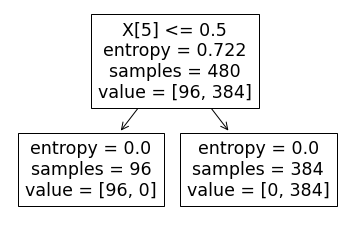

In [21]:
tree.plot_tree(model);

In [22]:
preds = model.predict(x_test)

In [23]:
preds

array([1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1.])

In [24]:
pd.crosstab(y_test,preds)

col_0,0.0,1.0
TaxInc_Good,,
0.0,28,0
1.0,0,92


In [25]:
np.mean(preds==y_test)

1.0

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
array = fraud_check.values
X = array[:,0:6]
y = array[:,6]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
model.score(X_test,y_test)

1.0

# Question 2

### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical ### variable) & all other variable will be independent in the analysis.  


In [38]:
Sales=pd.read_csv('/Users/apple/Downloads/Company_Data.csv')

In [39]:
Sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
Sales['ShelveLoc']= label_encoder.fit_transform(Sales['ShelveLoc'])
Sales['Urban']= label_encoder.fit_transform(Sales['Urban'])
Sales['US']= label_encoder.fit_transform(Sales['US'])

In [41]:
Sales.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [42]:
Sales['Sales'].max()

16.27

In [43]:
Sales["Sales_Report"] = pd.cut(Sales["Sales"], bins = [0.0,8.5,16.27], labels = ["High", "Low"])

In [44]:
Sales= pd.get_dummies(Sales,columns = ["Sales_Report"],drop_first=True)

In [45]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
Sales_norm = norm_func(Sales.iloc[:,:]) 
Sales_norm.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Report_Low
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,0.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,0.0


In [47]:
x2=Sales_norm.iloc[:,1:11]
y2=Sales_norm.iloc[:,11]

In [48]:
x2

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [49]:
y2

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: Sales_Report_Low, Length: 400, dtype: float64

In [50]:
xtrain, xtest,ytrain,ytest = train_test_split(x2,y2, test_size=0.2,random_state=40)

In [51]:
training_scores_encoded = label_encoder.fit_transform(ytrain)

In [52]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(xtrain,training_scores_encoded)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

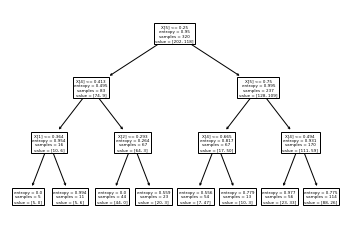

In [53]:
tree.plot_tree(model2);

In [54]:
y_preds = model2.predict(xtest)

In [55]:
y_preds

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [56]:
pd.crosstab(ytest,y_preds)

col_0,0,1
Sales_Report_Low,,
0.0,41,14
1.0,5,20


In [57]:
np.mean(y_preds==ytest)

0.7625

In [58]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [59]:
model_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [60]:
pred=model2.predict(xtest)
np.mean(y_preds==ytest)

0.7625

In [61]:
array = Sales.values
X = array[:,0:11]
y = array[:,11]

In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=1)

In [63]:
model3 = DecisionTreeRegressor()
model3.fit(X_train2, y_train2)

DecisionTreeRegressor()

In [64]:
model3.score(X_test2,y_test2)

1.0